In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shanegerami","key":"0c32ffffd343776b8cd094b718ef52a5"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

100% 199k/199k [00:00<00:00, 546kB/s]
100% 199k/199k [00:00<00:00, 545kB/s]


In [ ]:
!unzip house.zip

Archive:  house.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
df = pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#columns with nan:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<ipython-input-15-68ddf73d5a3b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


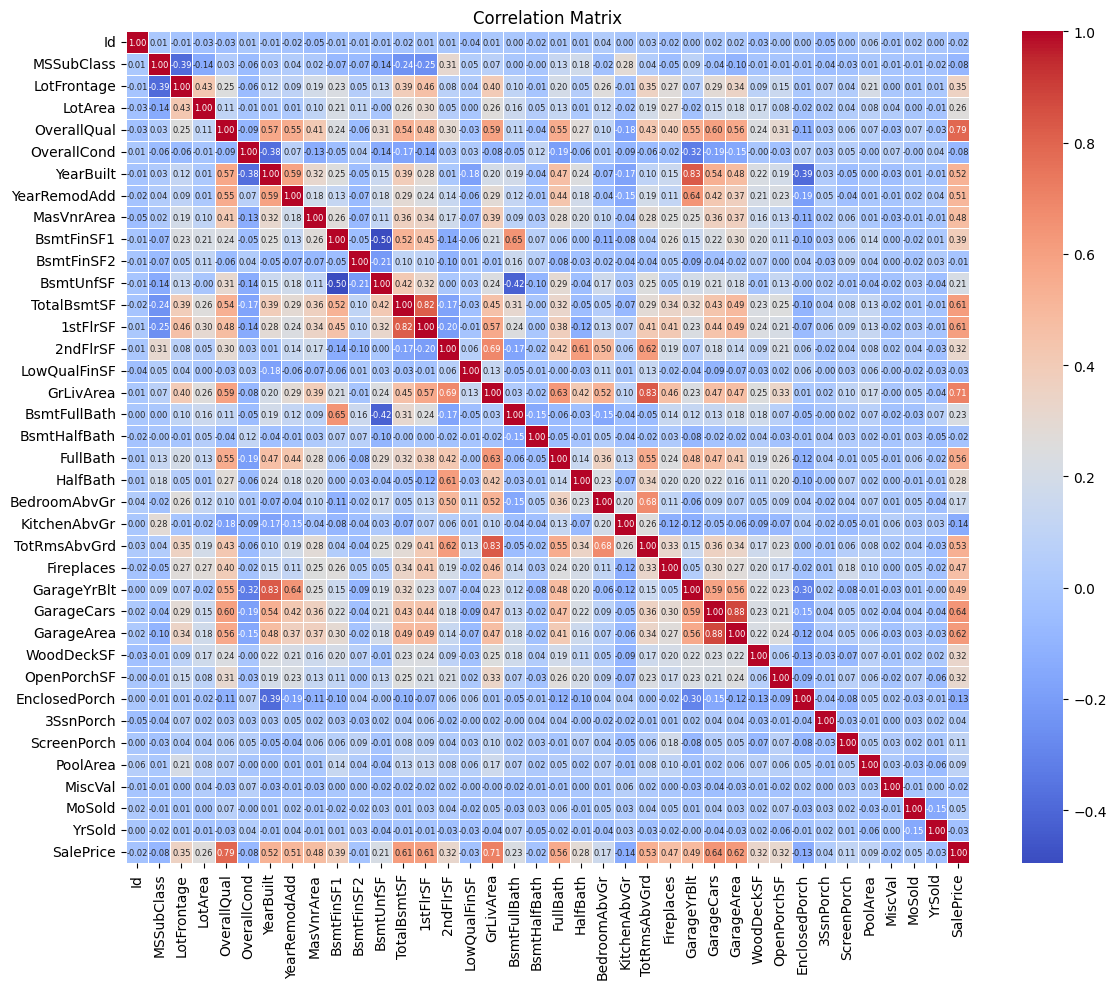

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn with smaller font size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 6})

# Set the title and adjust plot layout
plt.title("Correlation Matrix")
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-16-b3e38fd303b9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


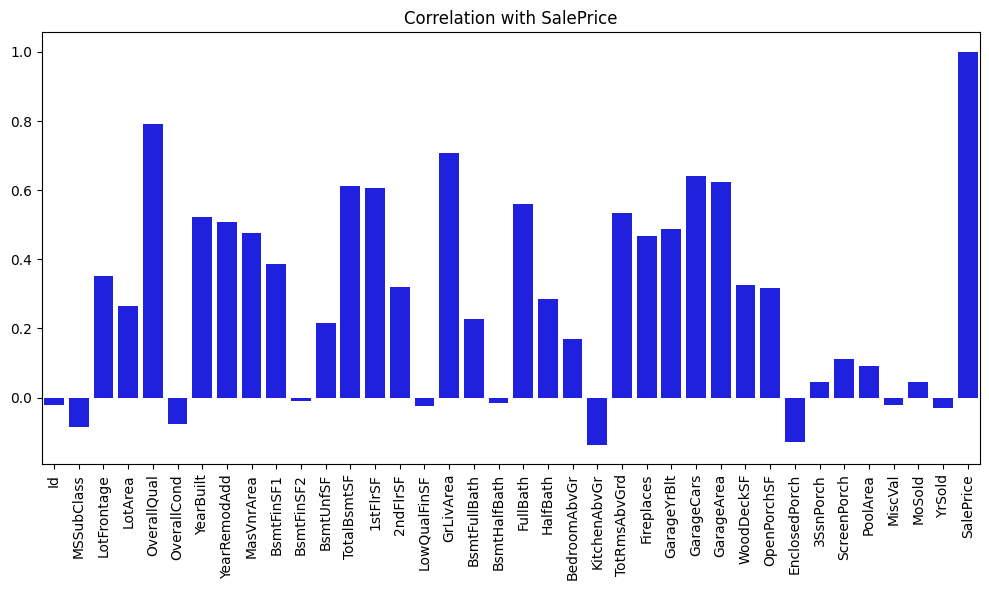

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = train.corr()
correlation_with_target = correlation_matrix['SalePrice']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn with a single-color colormap (grayscale)
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, color='blue')

# Set the title and adjust plot layout
plt.title("Correlation with SalePrice")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the correlation matrix
correlation_matrix = train.corr()
correlation_with_target = correlation_matrix['SalePrice'].abs()

# Select features with a correlation greater than a threshold
selected_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()

print(selected_features)


['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


<ipython-input-19-f3f73c2a7c11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


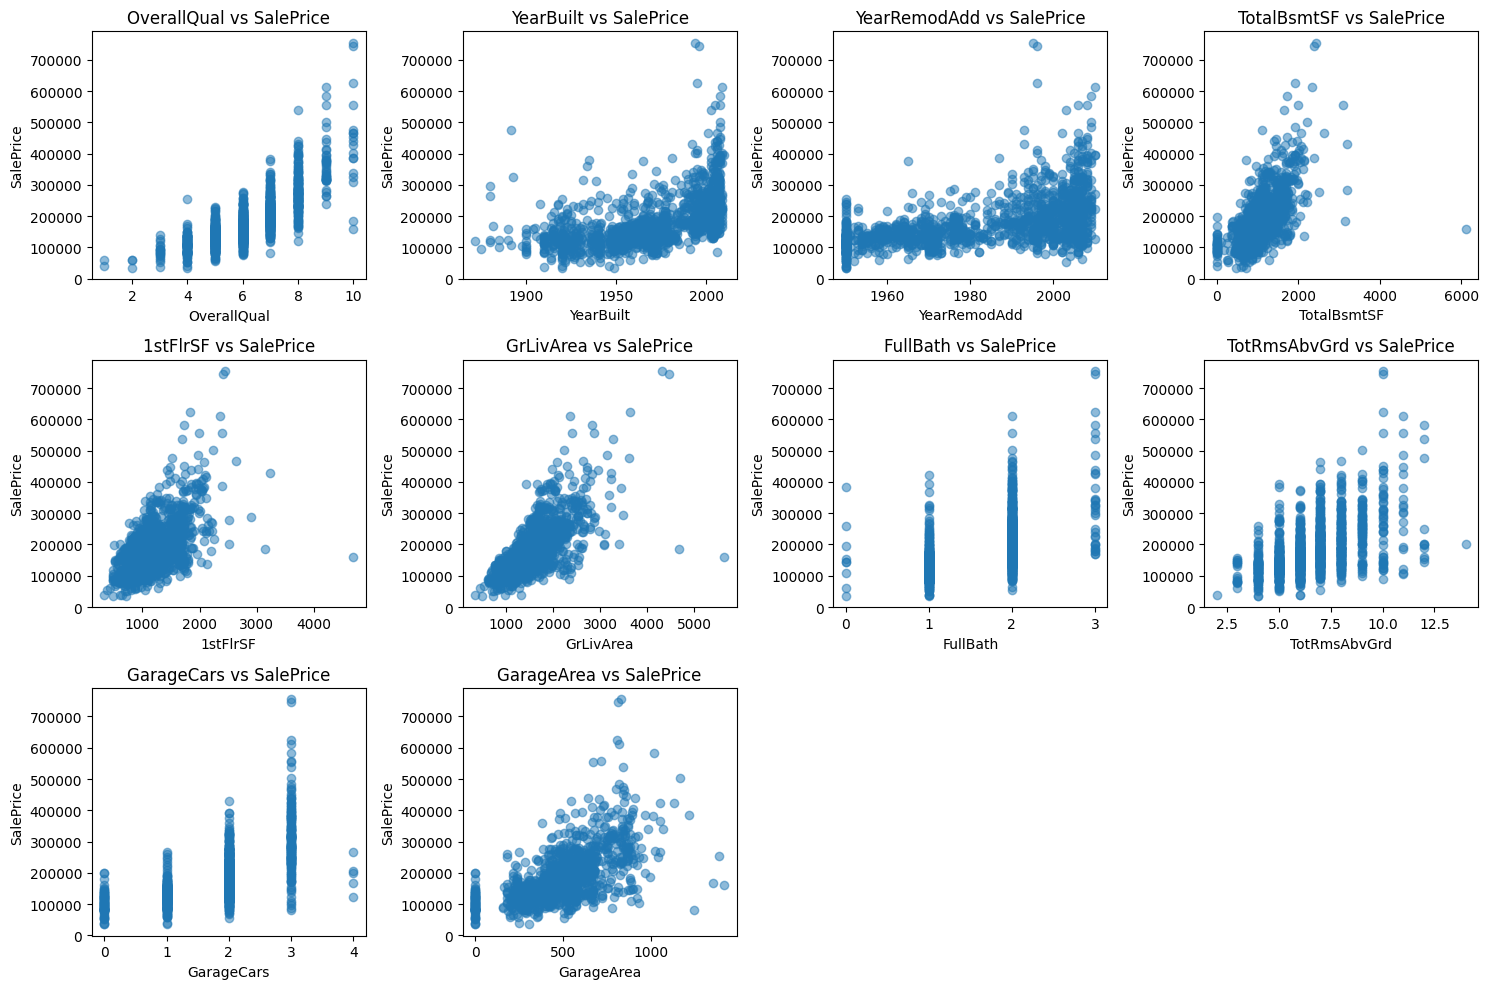

In [ ]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

# Create subplots for scatter plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i+1)  # Create a 3x4 grid of subplots
    plt.scatter(train[feature], train['SalePrice'], alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [ ]:
#Using all the features on training the model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# train = train.drop('Id', axis=1)  # Drop the 'Id' column

# Separate target variable and features
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Handle missing values with appropriate strategies
imputer_numerical = SimpleImputer(strategy='mean')
X[numerical_columns] = imputer_numerical.fit_transform(X[numerical_columns])

imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = imputer_categorical.fit_transform(X[categorical_columns])

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1239324891.5408669
Root Mean Squared Error (RMSE): 35204.04652225177
R-squared (R2) Score: 0.8384260515048741


In [ ]:
#Using feature selection methods

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression


# Separate target variable and features
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Handle missing values with appropriate strategies
imputer_numerical = SimpleImputer(strategy='mean')
X[numerical_columns] = imputer_numerical.fit_transform(X[numerical_columns])

imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = imputer_categorical.fit_transform(X[categorical_columns])

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Feature selection using SelectKBest
k = 50
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Assuming you have already fitted the SelectKBest object
selected_feature_indices = selector.get_support()

# Use the selected_feature_indices to get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Display the selected feature names
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC',
       'SaleCondition'],
      dtype='object')


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1224308258.6218793
Root Mean Squared Error (RMSE): 34990.11658485692
R-squared (R2) Score: 0.8403838082564601


In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

# Separate target variable and features
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Handle missing values with appropriate strategies
imputer_numerical = SimpleImputer(strategy='mean')
X[numerical_columns] = imputer_numerical.fit_transform(X[numerical_columns])

imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = imputer_categorical.fit_transform(X[categorical_columns])

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Feature selection using SelectKBest
k = 50
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the XGBoost Regression model
xgb_model = XGBRegressor()

# Perform a grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print('best parameters:', best_params)

# Train the XGBoost model with the best hyperparameters
xgb_model_best = XGBRegressor(**best_params)
xgb_model_best.fit(X_train, y_train)

# Evaluate the XGBoost model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

xgb_mse, xgb_rmse, xgb_r2 = evaluate_model(xgb_model_best, X_test, y_test)

print("XGBoost Regression - Mean Squared Error (MSE):", xgb_mse)
print("XGBoost Regression - Root Mean Squared Error (RMSE):", xgb_rmse)
print("XGBoost Regression - R-squared (R2) Score:", xgb_r2)


best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
XGBoost Regression - Mean Squared Error (MSE): 729916352.2216492
XGBoost Regression - Root Mean Squared Error (RMSE): 27016.964156278722
XGBoost Regression - R-squared (R2) Score: 0.904838942633533


In [1]:
#adding new features

In [ ]:
# Feature engineering for both training and test data
def add_new_features(data):
    data['TotalSF'] = data['1stFlrSF'] + data['2ndFlrSF']
    data['Age'] = data['YrSold'] - data['YearBuilt']
    data['YearsSinceRemodel'] = data['YrSold'] - data['YearRemodAdd']
    data['TotalBathrooms'] = data['FullBath'] + 0.5 * data['HalfBath']
    data['TotalPorchSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']
    data['HasPool'] = data['PoolQC'].apply(lambda x: 0 if pd.isna(x) else 1)
    data['GarageQuality'] = data[['GarageQual', 'GarageCond']].mean(axis=1)
    data['OutdoorArea'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['ScreenPorch']
    quality_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
    data['QualityScore'] = data[quality_columns].mean(axis=1)
    data['TotalBathrooms'] = data['FullBath'] + data['HalfBath'] + data['BsmtFullBath']
    data['TotalBedrooms'] = data['BedroomAbvGr'] + data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    data['BedroomToBathroomRatio'] = data['TotalBedrooms'] / data['TotalBathrooms']

# Add new features to both training and test data
add_new_features(train)
add_new_features(test)


<ipython-input-40-8c40a650b3b4>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['GarageQuality'] = data[['GarageQual', 'GarageCond']].mean(axis=1)
<ipython-input-40-8c40a650b3b4>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['QualityScore'] = data[quality_columns].mean(axis=1)
<ipython-input-40-8c40a650b3b4>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['GarageQuality'] = data[['GarageQual', 'GarageCond']].mean(axis=1)
<ipython-input-40-8c40a650b3b4>:13: Future

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Separate the features (X) and the target variable (y)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Encode categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define imputers for both numerical and categorical features
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for the entire dataset
X_train = numerical_imputer.fit_transform(X_train)
X_train = categorical_imputer.fit_transform(X_train)

X_test = numerical_imputer.fit_transform(X_test)
X_test = categorical_imputer.fit_transform(X_test)

# Initialize SelectKBest with the desired number of features (K)
# You can replace 'k' with the number of top features you want to select.
k = 40 # Replace with the desired number of top features
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the feature selection on the training data
X_train_new = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_features)


# Initialize the XGBoost Regressor with the best parameters
xgb_regressor = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=300)

# Fit the model on the selected features
xgb_regressor.fit(X_train_new, y_train)

# Make predictions on the test set
X_test_selected = selector.transform(X_test)

y_pred = xgb_regressor.predict(X_test_selected)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Selected Features:
Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'MiscVal', 'TotalSF', 'Age', 'YearsSinceRemodel',
       'TotalBathrooms', 'GarageAge'],
      dtype='object')
Mean Squared Error (MSE): 675216297.9004372
Mean Absolute Error (MAE): 17245.65040400257
R-squared (R2) Score: 0.9119703282935011


In [ ]:
import joblib

# Save the trained XGBoost model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(xgb_regressor, model_filename)
print(f"XGBoost model saved as {model_filename}")


XGBoost model saved as xgboost_model.pkl


In [2]:
#Using our model to make predictions on the test set

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load your trained XGBoost model
xgb_regressor = joblib.load('xgboost_model.pkl')

# Load your test data
test_data = test

# Separate the features (X) and the target variable (y) for the test data
# This step ensures that the selected features match the columns in the test data
X_test_data = test_data[selected_features]

# Define imputers for both numerical and categorical features
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocess the test data (similar to what you did for training data)
categorical_columns = X_test_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    label_encoder = LabelEncoder()
    X_test_data[col] = label_encoder.fit_transform(X_test_data[col])

# Impute missing values for the test data
X_test_data = numerical_imputer.fit_transform(X_test_data)
X_test_data = categorical_imputer.fit_transform(X_test_data)

# Make predictions on the test data
y_pred = xgb_regressor.predict(X_test_data)

# Create a DataFrame with Id and SalePrice
results = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred})

# Save the results to a CSV file
results.to_csv('kaggle_submission.csv', index=False)


<ipython-input-43-e6aebd2fed4f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_data[col] = label_encoder.fit_transform(X_test_data[col])
<ipython-input-43-e6aebd2fed4f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_data[col] = label_encoder.fit_transform(X_test_data[col])
<ipython-input-43-e6aebd2fed4f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
files.download('kaggle_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>